In [1]:
import numpy as np

# Part a

class BaryInterp:
    """
    Class takes in a numpy array of x_j with associated array of f_j
    """
        
    def __init__(self, x, f, weights=None):
        self.x = x
        self.f = f
        
        if weights is None:
            n = len(x)
            W = np.ones((n, n))

            # Fill in subdiagonals
            for i in range(n):
                for j in range(i):
                    W[i,j] = x[j] - x[i]

            # Fill in diagonals
            W[0,0] = 1
            for i in range(1, n):
                W[i,i] = np.prod(W[i,0:i]) * (-1) ** i

            # Multiply all values above
            for i in range(n):
                W[-1,i] = np.prod(W[:,i])

            self.w = np.reciprocal(W[-1,:])
        else:
            self.w = weights

        return
    
    def __call__(self, x):
        
        if x in self.x:
            return self.f[np.where(self.x == x)]
        else:
            num = 0
            den = 0
            for i in range(len(self.x)):
                num += self.w[i] * self.f[i]/(x - self.x[i])
                den += self.w[i]/(x - self.x[i])
            
            return num/den
    
    def update(self, x, f, weights=None):
        self.x = np.append(self.x, x)
        self.f = np.append(self.f, f)
        
        if weights is None:
            n = len(x)
            N = len(self.x)

            W = np.ones((n, N))

            # Fill in subdiagonals
            for i in range(n):
                for j in range(N-n+i):
                    W[i,j] = self.x[j] - self.x[N-n+i]

            # Fill in diagonals
            for i in range(n):
                W[i, n+i+1] = np.prod(W[i,0:N-n+i]) * (-1) ** (N-n+i)

            # Multiply all values above
            for i in range(N):
                W[-1,i] = np.prod(W[:,i])

            # Multiply by the old w^(N)
            self.w = np.append(np.reciprocal(self.w), np.ones((1,n))) * W[-1,:]
            self.w = np.reciprocal(self.w)
        else:
            self.w = weights
        return

In [2]:
# Part b

def chebnodes1(n):
    return np.array([np.cos((2*j+1)/(n+1)*np.pi/2) for j in range(n+1)])

def chebnodes2(n):
    return np.array([np.cos(j/n*np.pi) for j in range(n+1)])

def chebweights1(n):
    return np.array([np.power(-1, j)*np.sin((2*j+1)/(n+1) * np.pi/2) for j in range(n+1)])

def chebweights2(n):
    return np.array([1/2] + [np.power(-1, j) for j in range(1,n)] + [np.power(-1,n)/2])

# Sanity check
print(chebweights1(3))
print(chebweights2(3))

[ 0.38268343 -0.92387953  0.92387953 -0.38268343]
[ 0.5 -1.   1.  -0.5]


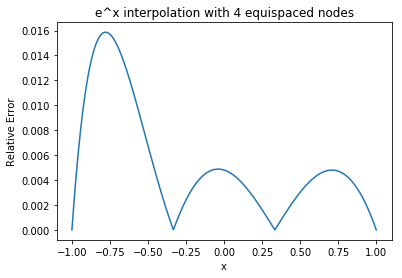

Max relative error: 0.015862018637759306


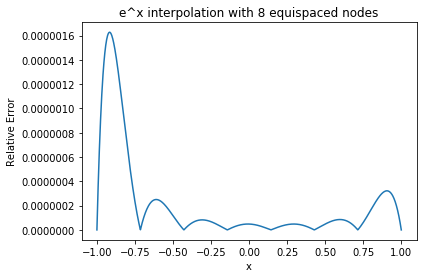

Max relative error: 1.627414943261933e-06


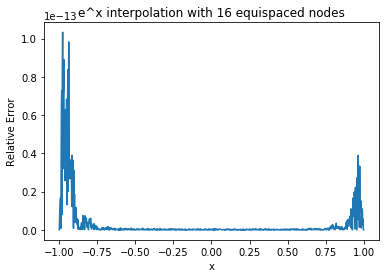

Max relative error: 1.0332806046148538e-13


In [10]:
import matplotlib.pyplot as plt

# Part c

# Part i
for num_nodes in [4,8,16]:
    nodes = np.linspace(-1,1,num_nodes)
    f = np.exp(nodes)
    p = BaryInterp(nodes, f)
    
    x = np.linspace(-1,1,1001)
    f_interp = np.array([p(i) for i in x])
    f_actual = np.exp(x)
    error = abs((f_interp-f_actual)/f_actual)
    
    plt.plot(x, error)
    plt.title('e^x interpolation with ' + str(num_nodes) + ' equispaced nodes')
    plt.xlabel('x')
    plt.ylabel('Relative Error')
    plt.show()
    print('Max relative error: ' + str(error.max()))


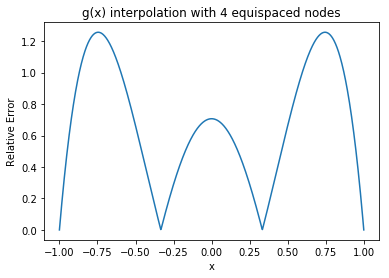

Max relative error: 1.2569071519343897


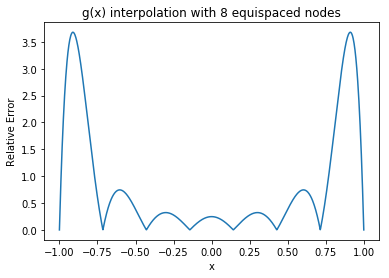

Max relative error: 3.6792655802995737


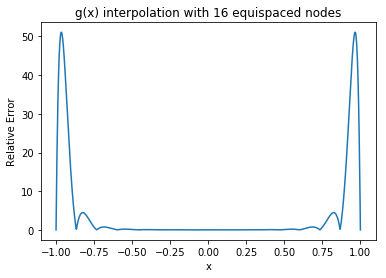

Max relative error: 51.0769473820736


In [4]:
# Part ii

for num_nodes in [4,8,16]:
    nodes = np.linspace(-1,1,num_nodes)
    f = 1/(1+25*np.power(nodes,2))
    p = BaryInterp(nodes, f)
    
    x = np.linspace(-1,1,1001)
    f_interp = np.array([p(i) for i in x])
    f_actual = 1/(1+25*np.power(x,2))
    error = abs((f_interp-f_actual)/f_actual)
    
    plt.plot(x, error)
    plt.title('g(x) interpolation with ' + str(num_nodes) + ' equispaced nodes')
    plt.xlabel('x')
    plt.ylabel('Relative Error')
    plt.show()
    print('Max relative error: ' + str(error.max()))

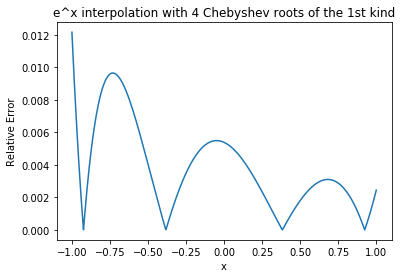

Max relative error: 0.012157034328108851


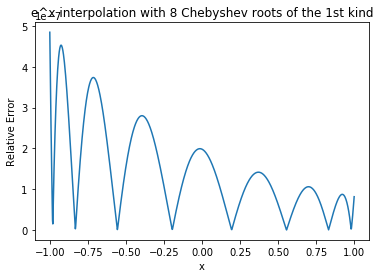

Max relative error: 4.843765066532343e-07


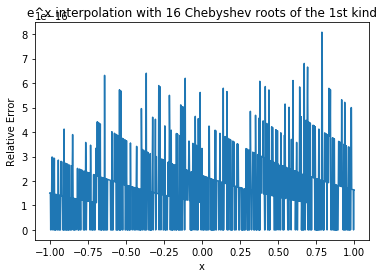

Max relative error: 8.0780430019434155e-16


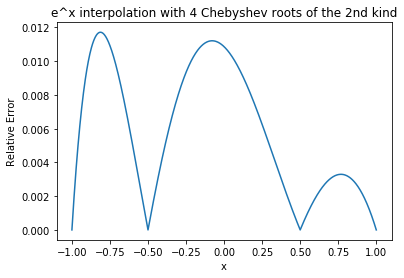

Max relative error: 0.011716446906674569


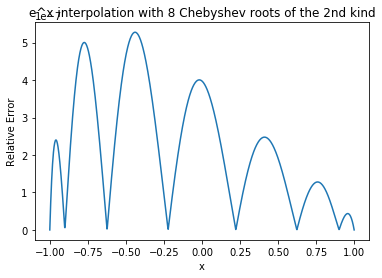

Max relative error: 5.275789099427979e-07


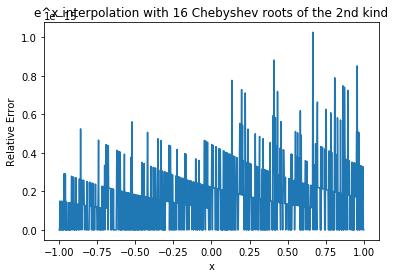

Max relative error: 1.0266977492778796e-15


In [5]:
# Part iii.

# 1st kind
for num_nodes in [4,8,16]:
    nodes = chebnodes1(num_nodes-1)
    f = np.exp(nodes)
    weights = chebweights1(num_nodes-1)
    p = BaryInterp(nodes, f, weights=weights)
    
    x = np.linspace(-1,1,1001)
    f_interp = np.array([p(i) for i in x])
    f_actual = np.exp(x)
    error = abs((f_interp-f_actual)/f_actual)
    
    plt.plot(x, error)
    plt.title('e^x interpolation with ' + str(num_nodes) + ' Chebyshev roots of the 1st kind')
    plt.xlabel('x')
    plt.ylabel('Relative Error')
    plt.show()
    print('Max relative error: ' + str(error.max()))
    
# 2nd kind
for num_nodes in [4,8,16]:
    nodes = chebnodes2(num_nodes-1)
    f = np.exp(nodes)
    weights = chebweights2(num_nodes-1)
    p = BaryInterp(nodes, f, weights=weights)
    
    x = np.linspace(-1,1,1001)
    f_interp = np.array([p(i) for i in x])
    f_actual = np.exp(x)
    error = abs((f_interp-f_actual)/f_actual)
    
    plt.plot(x, error)
    plt.title('e^x interpolation with ' + str(num_nodes) + ' Chebyshev roots of the 2nd kind')
    plt.xlabel('x')
    plt.ylabel('Relative Error')
    plt.show()
    print('Max relative error: ' + str(error.max()))
    

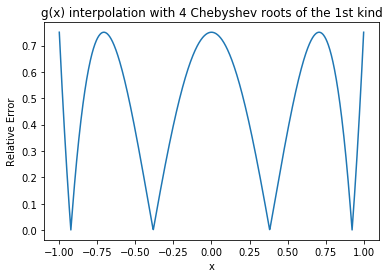

Max relative error: 0.7503001200480195


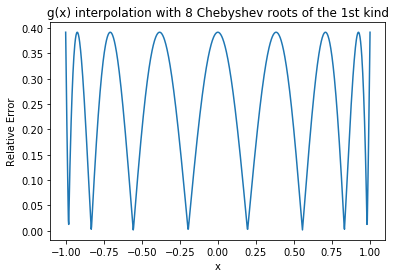

Max relative error: 0.3917402845902289


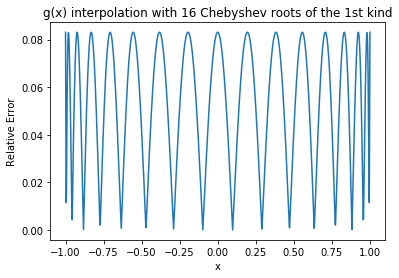

Max relative error: 0.08310704778474812


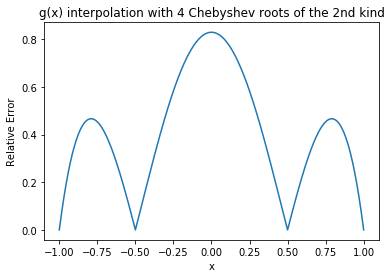

Max relative error: 0.8289124668435013


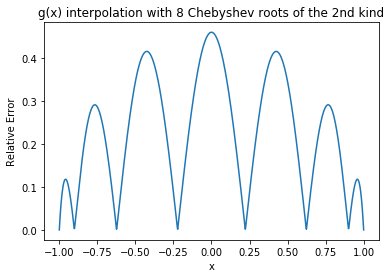

Max relative error: 0.45960532477403604


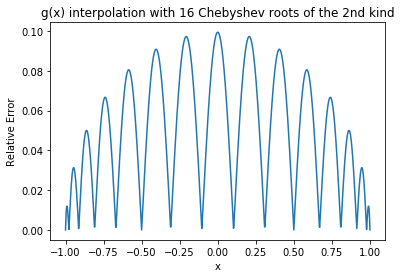

Max relative error: 0.0993218579519416


In [6]:
# Part iv

# 1st kind
for num_nodes in [4,8,16]:
    nodes = chebnodes1(num_nodes-1)
    f = 1/(1+25*np.power(nodes,2))
    weights = chebweights1(num_nodes-1)
    p = BaryInterp(nodes, f, weights=weights)
    
    x = np.linspace(-1,1,1001)
    f_interp = np.array([p(i) for i in x])
    f_actual = 1/(1+25*np.power(x,2))
    error = abs((f_interp-f_actual)/f_actual)
    
    plt.plot(x, error)
    plt.title('g(x) interpolation with ' + str(num_nodes) + ' Chebyshev roots of the 1st kind')
    plt.xlabel('x')
    plt.ylabel('Relative Error')
    plt.show()
    print('Max relative error: ' + str(error.max()))
    
# 2nd kind
for num_nodes in [4,8,16]:
    nodes = chebnodes2(num_nodes-1)
    f = 1/(1+25*np.power(nodes,2))
    weights = chebweights2(num_nodes-1)
    p = BaryInterp(nodes, f, weights=weights)
    
    x = np.linspace(-1,1,1001)
    f_interp = np.array([p(i) for i in x])
    f_actual = 1/(1+25*np.power(x,2))
    error = abs((f_interp-f_actual)/f_actual)
    
    plt.plot(x, error)
    plt.title('g(x) interpolation with ' + str(num_nodes) + ' Chebyshev roots of the 2nd kind')
    plt.xlabel('x')
    plt.ylabel('Relative Error')
    plt.show()
    print('Max relative error: ' + str(error.max()))

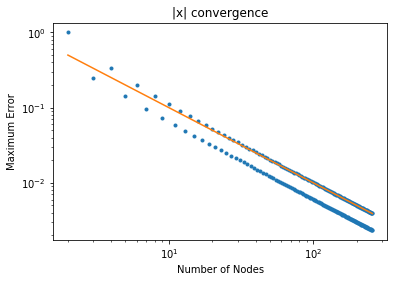

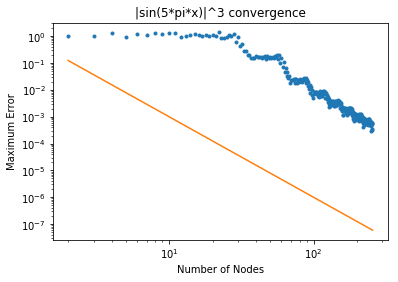

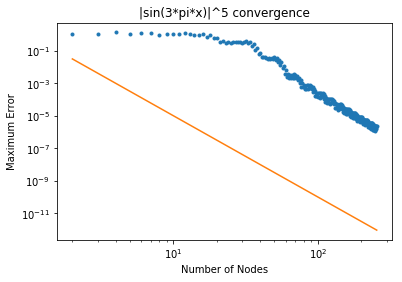

In [7]:
# Part d

# Part i

max_iter = 257
max_errors = []
for num_nodes in range(2,max_iter):
    nodes = chebnodes2(num_nodes-1)
    f = np.abs(nodes)
    weights = chebweights2(num_nodes-1)
    p = BaryInterp(nodes, f, weights=weights)
    
    x = np.linspace(-1,1,10001)
    f_interp = np.array([p(i) for i in x])
    f_actual = np.abs(x)
    error = abs(f_interp-f_actual)
    max_errors.append(error.max())
    
plt.plot(range(2,max_iter), max_errors, linestyle='None',marker='.')
plt.plot(range(2,max_iter), [1/n for n in range(2,max_iter)])
plt.title('|x| convergence')
plt.xlabel('Number of Nodes')
plt.ylabel('Maximum Error')
plt.xscale('log')
plt.yscale('log')
plt.show()

max_errors = []
for num_nodes in range(2,max_iter):
    nodes = chebnodes2(num_nodes-1)
    f = np.abs(np.power(np.sin(5*np.pi*nodes),3))
    weights = chebweights2(num_nodes-1)
    p = BaryInterp(nodes, f, weights=weights)
    
    x = np.linspace(-1,1,10001)
    f_interp = np.array([p(i) for i in x])
    f_actual = np.abs(np.power(np.sin(5*np.pi*x),3))
    error = abs(f_interp-f_actual)
    max_errors.append(error.max())
    
plt.plot(range(2,max_iter), max_errors, linestyle='None',marker='.')
plt.plot(range(2,max_iter), [1/n**3 for n in range(2,max_iter)])
plt.title('|sin(5*pi*x)|^3 convergence')
plt.xlabel('Number of Nodes')
plt.ylabel('Maximum Error')
plt.xscale('log')
plt.yscale('log')
plt.show()

max_errors = []
for num_nodes in range(2,max_iter):
    nodes = chebnodes2(num_nodes-1)
    f = np.abs(np.power(np.sin(3*np.pi*nodes),5))
    weights = chebweights2(num_nodes-1)
    p = BaryInterp(nodes, f, weights=weights)
    
    x = np.linspace(-1,1,10001)
    f_interp = np.array([p(i) for i in x])
    f_actual = np.abs(np.power(np.sin(3*np.pi*x),5))
    error = abs(f_interp-f_actual)
    max_errors.append(error.max())
    
plt.plot(range(2,max_iter), max_errors, linestyle='None',marker='.')
plt.plot(range(2,max_iter), [1/n**5 for n in range(2,max_iter)])
plt.title('|sin(3*pi*x)|^5 convergence')
plt.xlabel('Number of Nodes')
plt.ylabel('Maximum Error')
plt.xscale('log')
plt.yscale('log')
plt.show()

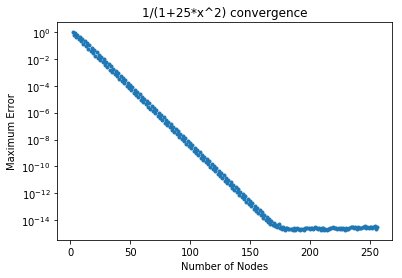

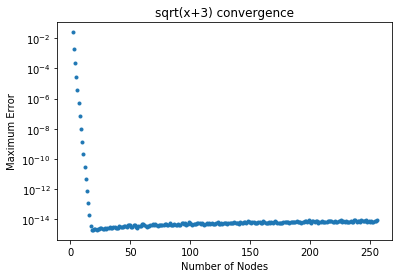

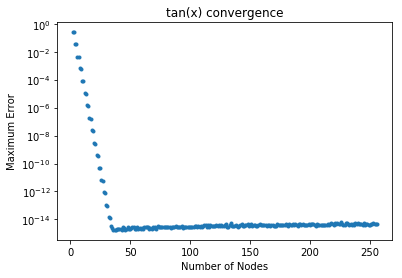

In [8]:
# Part ii

max_iter = 257
max_errors = []
for num_nodes in range(2,max_iter):
    nodes = chebnodes2(num_nodes-1)
    f = 1/(1+25*np.power(nodes,2))
    weights = chebweights2(num_nodes-1)
    p = BaryInterp(nodes, f, weights=weights)
    
    x = np.linspace(-1,1,10001)
    f_interp = np.array([p(i) for i in x])
    f_actual = 1/(1+25*np.power(x,2))
    error = abs(f_interp-f_actual)
    max_errors.append(error.max())
    
plt.plot(range(2,max_iter), max_errors, linestyle='None',marker='.')
plt.title('1/(1+25*x^2) convergence')
plt.xlabel('Number of Nodes')
plt.ylabel('Maximum Error')
plt.yscale('log')
plt.show()

max_errors = []
for num_nodes in range(2,max_iter):
    nodes = chebnodes2(num_nodes-1)
    f = np.sqrt(nodes+3)
    weights = chebweights2(num_nodes-1)
    p = BaryInterp(nodes, f, weights=weights)
    
    x = np.linspace(-1,1,10001)
    f_interp = np.array([p(i) for i in x])
    f_actual = np.sqrt(x+3)
    error = abs(f_interp-f_actual)
    max_errors.append(error.max())
    
plt.plot(range(2,max_iter), max_errors, linestyle='None',marker='.')
plt.title('sqrt(x+3) convergence')
plt.xlabel('Number of Nodes')
plt.ylabel('Maximum Error')
plt.yscale('log')
plt.show()

max_errors = []
for num_nodes in range(2,max_iter):
    nodes = chebnodes2(num_nodes-1)
    f = np.tan(nodes)
    weights = chebweights2(num_nodes-1)
    p = BaryInterp(nodes, f, weights=weights)
    
    x = np.linspace(-1,1,10001)
    f_interp = np.array([p(i) for i in x])
    f_actual = np.tan(x)
    error = abs(f_interp-f_actual)
    max_errors.append(error.max())
    
plt.plot(range(2,max_iter), max_errors, linestyle='None',marker='.')
plt.title('tan(x) convergence')
plt.xlabel('Number of Nodes')
plt.ylabel('Maximum Error')
plt.yscale('log')
plt.show()

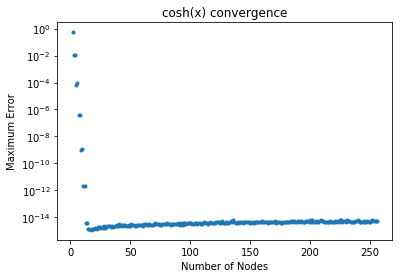

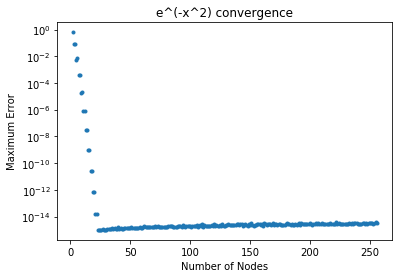

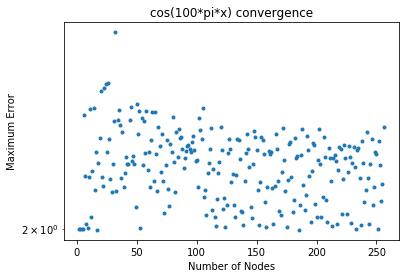

In [9]:
# Part iii

max_iter = 257
max_errors = []
for num_nodes in range(2,max_iter):
    nodes = chebnodes2(num_nodes-1)
    f = np.cosh(nodes)
    weights = chebweights2(num_nodes-1)
    p = BaryInterp(nodes, f, weights=weights)
    
    x = np.linspace(-1,1,10001)
    f_interp = np.array([p(i) for i in x])
    f_actual = np.cosh(x)
    error = abs(f_interp-f_actual)
    max_errors.append(error.max())
    
plt.plot(range(2,max_iter), max_errors, linestyle='None',marker='.')
plt.title('cosh(x) convergence')
plt.xlabel('Number of Nodes')
plt.ylabel('Maximum Error')
plt.yscale('log')
plt.show()

max_errors = []
for num_nodes in range(2,max_iter):
    nodes = chebnodes2(num_nodes-1)
    f = np.exp(-np.power(nodes,2))
    weights = chebweights2(num_nodes-1)
    p = BaryInterp(nodes, f, weights=weights)
    
    x = np.linspace(-1,1,10001)
    f_interp = np.array([p(i) for i in x])
    f_actual = np.exp(-np.power(x,2))
    error = abs(f_interp-f_actual)
    max_errors.append(error.max())
    
plt.plot(range(2,max_iter), max_errors, linestyle='None',marker='.')
plt.title('e^(-x^2) convergence')
plt.xlabel('Number of Nodes')
plt.ylabel('Maximum Error')
plt.yscale('log')
plt.show()

max_errors = []
for num_nodes in range(2,max_iter):
    nodes = chebnodes2(num_nodes-1)
    f = np.cos(100*np.pi*nodes)
    weights = chebweights2(num_nodes-1)
    p = BaryInterp(nodes, f, weights=weights)
    
    x = np.linspace(-1,1,10001)
    f_interp = np.array([p(i) for i in x])
    f_actual = np.cos(100*np.pi*x)
    error = abs(f_interp-f_actual)
    max_errors.append(error.max())
    
plt.plot(range(2,max_iter), max_errors, linestyle='None',marker='.')
plt.title('cos(100*pi*x) convergence')
plt.xlabel('Number of Nodes')
plt.ylabel('Maximum Error')
plt.yscale('log')
plt.show()